In [1]:
import numpy as np 
import pandas as pd 
import io

# Importation of data

In [2]:
#df = pd.read_csv('combine.csv')
df = pd.read_csv('combine.csv', low_memory=False)


In [3]:
# Suppress the convergence warning

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Data exploration

Descovring Data and analysing it :

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
df.tail()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2214464,53,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214465,58030,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.92031,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214466,53,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214467,53,94939.0,4.0,2.0,188.0,226.0,47.0,47.0,47.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2214468,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As u can see in this table that last line is absolutly null so we gonna remove it

In [6]:
#remove the last ligne 
df = df.iloc[:-1]


In [7]:
#Liste the columns of our data
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

Know as u can see the we have some columns name that have espace before or after the name, that well cause a problem for as will searching for a columns so we gonna remove them

In [8]:
#to elemenate the espaces before the after the name of the column
df.columns = df.columns.str.strip()



In [9]:
# Rows and columns length  
df.shape

(2214468, 79)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214468 entries, 0 to 2214467
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             object 
 1   Flow Duration                float64
 2   Total Fwd Packets            float64
 3   Total Backward Packets       float64
 4   Total Length of Fwd Packets  float64
 5   Total Length of Bwd Packets  float64
 6   Fwd Packet Length Max        float64
 7   Fwd Packet Length Min        float64
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        float64
 11  Bwd Packet Length Min        float64
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 float64
 19  

In [11]:
df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,...,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06,2.214468e+06
mean,1.577101e+07,8.426575e+00,9.099413e+00,5.525557e+02,1.380931e+04,2.175610e+02,1.803134e+01,6.091672e+01,7.440612e+01,9.964694e+02,...,5.588132e+00,-8.450841e+02,8.389671e+04,3.957947e+04,1.500806e+05,6.094021e+04,9.683049e+06,6.038313e+05,1.013852e+07,9.218178e+06
std,3.447849e+07,6.855523e+02,9.072624e+02,1.079827e+04,2.058418e+06,7.718302e+02,6.507945e+01,2.023852e+02,3.082944e+02,2.136052e+03,...,6.544910e+02,2.703418e+05,6.563416e+05,4.015128e+05,1.023169e+06,5.807173e+05,2.569627e+07,5.100524e+06,2.649954e+07,2.542271e+07
min,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.360000e+02,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.131450e+04,2.000000e+00,2.000000e+00,6.000000e+01,1.200000e+02,3.600000e+01,2.000000e+00,3.300000e+01,0.000000e+00,7.800000e+01,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.336639e+06,5.000000e+00,5.000000e+00,2.700000e+02,6.520000e+02,1.210000e+02,3.400000e+01,5.000000e+01,2.713546e+01,3.800000e+02,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,...,2.135570e+05,1.260000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


# Data preprocessing

Cleaning Data

In [12]:
#remove all the not signeficant content
#for i in df.columns:
    #df = df[df[i] != "Infinity"]
    #df = df[df[i] != np.nan]
    #df = df[df[i] != ",,"]

df.isnull().any(1)
df.dropna(axis=0, how='any')
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [13]:
#See the repeded value for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Destination Port': ['54865' '55054' '55055' ... '22635' '16210' '34979']
Unique values in column 'Flow Duration': [3.0000000e+00 1.0900000e+02 5.2000000e+01 ... 1.1509095e+07 1.1512230e+07
 1.0486350e+06]
Unique values in column 'Total Fwd Packets': [2.000e+00 1.000e+00 3.000e+00 ... 6.969e+03 1.158e+03 9.951e+03]
Unique values in column 'Total Backward Packets': [0.0000e+00 1.0000e+00 2.0000e+00 ... 4.5910e+03 1.0290e+03 1.4759e+04]
Unique values in column 'Total Length of Fwd Packets': [1.2000e+01 6.0000e+00 3.7000e+01 ... 3.5380e+04 3.3901e+04 1.0775e+04]
Unique values in column 'Total Length of Bwd Packets': [0.00000e+00 6.00000e+00 1.76000e+02 ... 7.44380e+04 1.47609e+05
 2.67793e+05]
Unique values in column 'Fwd Packet Length Max': [   6.   31.    0. ... 3618. 4118. 3419.]
Unique values in column 'Fwd Packet Length Min': [6.000e+00 0.000e+00 3.100e+01 3.700e+01 4.100e+01 4.600e+01 3.400e+01
 3.500e+01 4.000e+01 3.200e+01 3.600e+01 4.800e+01 5.000e+01 4.50

Unique values in column 'Bwd Packet Length Mean': [  0.          6.         88.        ... 226.1111111 995.5130112
 520.0909091]
Unique values in column 'Bwd Packet Length Std': [  0.         16.1606518 879.8869246 ... 694.1340829 112.536978
 606.4607909]
Unique values in column 'Flow Bytes/s': [4.00000000e+06 1.10091743e+05 2.30769231e+05 ... 1.37654321e+06
 4.27222055e+02 4.36069476e+03]
Unique values in column 'Flow Packets/s': [6.66666667e+05 1.83486238e+04 3.84615385e+04 ... 1.12954146e+00
 8.68641436e-01 7.62896527e+00]
Unique values in column 'Flow IAT Mean': [3.00000000e+00 1.09000000e+02 5.20000000e+01 ... 8.58813333e+04
 9.59091250e+05 1.27913667e+06]
Unique values in column 'Flow IAT Std': [0.00000000e+00 7.07106781e-01 2.12132034e+00 ... 1.36175795e+04
 3.75521041e+05 3.16641026e+04]
Unique values in column 'Flow IAT Max': [3.000000e+00 1.090000e+02 5.200000e+01 ... 2.574530e+05 6.504954e+06
 6.506213e+06]
Unique values in column 'Flow IAT Min': [3.00000e+00 1.09000e+02 5.2

Unique values in column 'Active Max': [      0.   46735. 3591908. ...   16944.  379019.  119807.]
Unique values in column 'Active Min': [      0.   46735. 3591908. ...   16944.  243437.  379019.]
Unique values in column 'Idle Mean': [       0. 30900000.  7114425. ...  6503248.  6504954.  6506213.]
Unique values in column 'Idle Std': [       0.      12900000.        140678.187   ...  9879172.026
  2116770.738      20713.30669]
Unique values in column 'Idle Max': [       0. 30900000.  7114425. ...  6503248.  6504954.  6506213.]
Unique values in column 'Idle Min': [       0. 30900000.  7114425. ...  6503248.  6504954.  6506213.]
Unique values in column 'Label': ['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


In [14]:
#we gonna drop the columns that contient just one value 
columns_drop = ['Fwd Avg Bytes/Bulk','Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate','Bwd Avg Bytes/Bulk','Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Bwd URG Flags','Bwd PSH Flags']
df=df.drop(columns=columns_drop)

we can see also that the label have a lot of classes, in our case we just wanna know if the trafic is normal or not, so for that we gonna keep the BENIGN class and rename it to normal, and join all the rest in one class and name it Abnormal

In [15]:
# create to class normal and abnormal
df['Label'] = df['Label'].replace('BENIGN', 'Normal')
df['Label'] = df['Label'].replace(['DDoS', 'PortScan', 'Bot', 'Infiltration',
                                   'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
                                   'DoS GoldenEye', 'Heartbleed'], 'Abnormal')
# make sure that we have the result
df['Label'].unique()

array(['Normal', 'Abnormal'], dtype=object)

In [16]:
df['Label']

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
            ...  
2214463    Normal
2214464    Normal
2214465    Normal
2214466    Normal
2214467    Normal
Name: Label, Length: 2214468, dtype: object

Balancing the dateset :

In [17]:
# class balance study
class0 = round(df['Label'].value_counts()[0] / len(df) * 100, 2)
cLass1 = round(df['Label'].value_counts()[1] / len(df) * 100, 2)

print('Normal  (class 0): %d percentage: %.2f%%' % (df['Label'].value_counts()[0], class0))
print('Abnormal (class 1) : %d percentage :  %.2f%%' % (df['Label'].value_counts()[1], cLass1))

Normal  (class 0): 1672837 percentage: 75.54%
Abnormal (class 1) : 541631 percentage :  24.46%


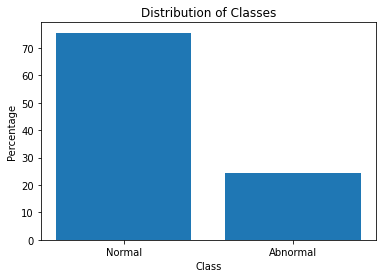

In [18]:
import matplotlib.pyplot as plt

# Calculate the percentage of each class
class_counts = df['Label'].value_counts()
total_count = len(df)
class_percentages = class_counts / total_count * 100

# Create a bar plot
plt.bar(['Normal', 'Abnormal'], class_percentages)

# Add labels and title to the plot
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.title('Distribution of Classes')

# Display the plot
plt.show()


As you can see,there is an extreme class imbalance.

Solution:

Maybe stratification! 
 or Oversampling 
 or undersampling
 
In my case I m gonna do the undersampling


Original class distribution:
Normal class count: 1672837
Normal class percentage: 75.5412586679961 %
Abnormal class count: 541631
Abnormal class percentage: 24.458741332003893 %

Undersampled class distribution:
Normal class count: 1083262
Normal class percentage: 66.66666666666666 %
Abnormal class count: 541631
Abnormal class percentage: 33.33333333333333 %


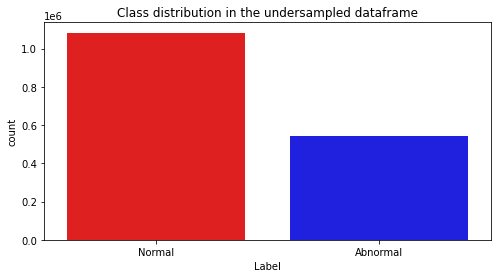

In [19]:
import seaborn as sns

# Class distribution in the original dataframe
class_counts = df['Label'].value_counts()
normal_count = class_counts['Normal']
abnormal_count = class_counts['Abnormal']
total_samples = len(df)

print('Original class distribution:')
print('Normal class count:', normal_count)
print('Normal class percentage:', (normal_count / total_samples) * 100, '%')
print('Abnormal class count:', abnormal_count)
print('Abnormal class percentage:', (abnormal_count / total_samples) * 100, '%')

# Determine the target count for the Normal class based on the Abnormal class count
target_count = abnormal_count * 2

# Undersampling the Normal class
normal_df = df[df['Label'] == 'Normal'].sample(n=target_count, random_state=42)

# Keeping all the data of the Abnormal class
abnormal_df = df[df['Label'] == 'Abnormal']

# Concatenating the undersampled Normal class and the Abnormal class
undersampled_df = pd.concat([normal_df, abnormal_df])

# Shuffle the dataframe
undersampled_df = undersampled_df.sample(frac=1, random_state=42)

# Class distribution in the undersampled dataframe
undersampled_class_counts = undersampled_df['Label'].value_counts()
undersampled_normal_count = undersampled_class_counts['Normal']
undersampled_abnormal_count = undersampled_class_counts['Abnormal']

print('\nUndersampled class distribution:')
print('Normal class count:', undersampled_normal_count)
print('Normal class percentage:', (undersampled_normal_count / len(undersampled_df)) * 100, '%')
print('Abnormal class count:', undersampled_abnormal_count)
print('Abnormal class percentage:', (undersampled_abnormal_count / len(undersampled_df)) * 100, '%')

# Plot the class distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=undersampled_df, x='Label', palette=['r', 'b'])
plt.title('Class distribution in the undersampled dataframe')
plt.show()


We passed to Feature selection by removing the duplicated data and correlated atribute and replace the missing value with the median value of each columns

In [20]:
ln = len(df)
# Removing duplicate rows
df = df.drop_duplicates()

# Counting the number of duplicate rows
num_duplicates = ln -len(df) 

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 271598


In [21]:
# Missing values

# Count the number of missing values per column
missing_values = df.isnull().sum()

# Show columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])
print()

# Replace missing values with the mean of each column
for column in missing_values[missing_values > 0].index:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Verify that missing values have been replaced
missing_values_after_fillna = df.isnull().sum()
print("Columns with missing values after filling with mean:")
print(missing_values_after_fillna[missing_values_after_fillna > 0])


Columns with missing values:
Flow Bytes/s      1218
Flow Packets/s    1214
dtype: int64

Columns with missing values after filling with mean:
Series([], dtype: int64)


In [22]:
df.shape

(1942870, 71)

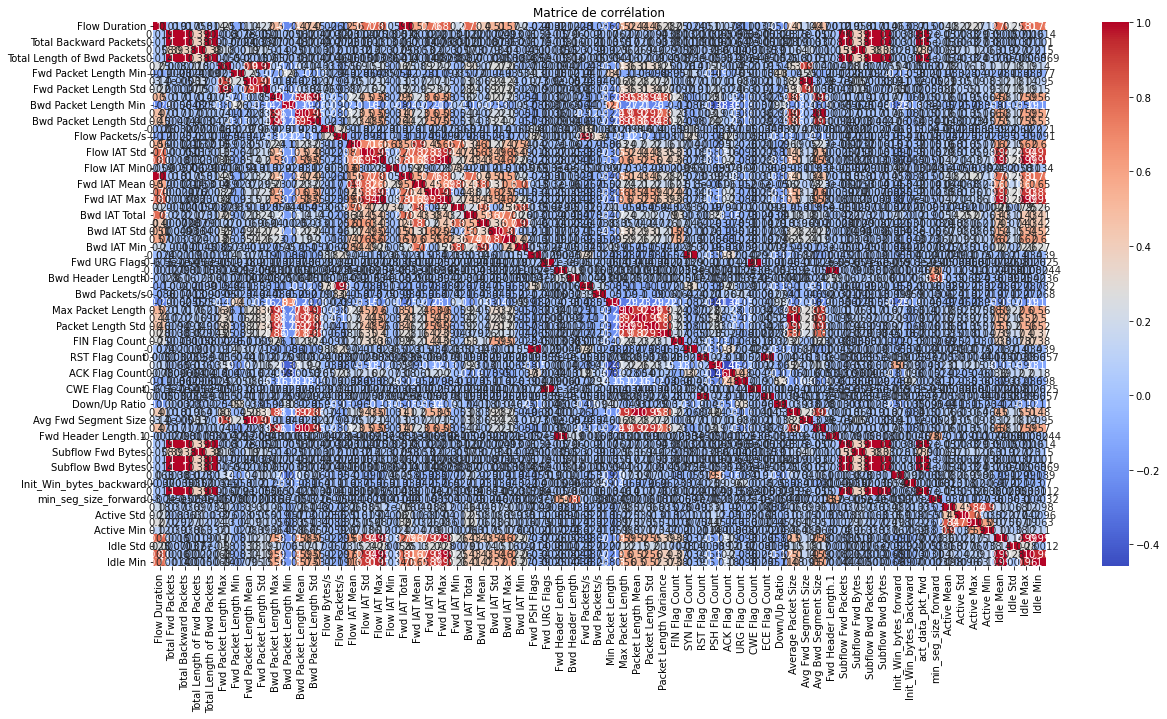

In [23]:
# The correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Display the correlation matrix with a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


In [24]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
              colname = corr_matrix.columns[i]                  
              col_corr.add(colname)
    return col_corr

In [25]:
corr_features = correlation(df, 0.8)
corr_features

{'Active Max',
 'Active Min',
 'Average Packet Size',
 'Avg Bwd Segment Size',
 'Avg Fwd Segment Size',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'CWE Flag Count',
 'ECE Flag Count',
 'Flow IAT Max',
 'Fwd Header Length.1',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Total',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Fwd Packets/s',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'SYN Flag Count',
 'Subflow Bwd Bytes',
 'Subflow Bwd Packets',
 'Subflow Fwd Bytes',
 'Subflow Fwd Packets',
 'Total Backward Packets',
 'Total Length of Bwd Packets',
 'act_data_pkt_fwd',
 'min_seg_size_forward'}

In [26]:
df=df.drop(columns=corr_features)
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Bwd IAT Total',
       'Bwd IAT Std', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Bwd Packets/s', 'Min Packet Length',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'Down/Up Ratio', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Active Mean', 'Active Std', 'Idle Std',
       'Label'],
      dtype='object')

In [27]:
df.to_csv('preprocessed_data.csv', index=False)

In [30]:
df1 = pd.read_csv('preprocessed_data.csv', low_memory=False)
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,...,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,Active Mean,Active Std,Idle Std,Label
0,54865,3.0,2.0,12.0,6.0,6.0,0.0,0.0,4.000000e+06,666666.66670,...,0.0,1.0,0.0,0.0,33.0,-1.0,0.0,0.0,0.0,Normal
1,55054,109.0,1.0,6.0,6.0,6.0,6.0,6.0,1.100917e+05,18348.62385,...,0.0,1.0,1.0,1.0,29.0,256.0,0.0,0.0,0.0,Normal
2,55055,52.0,1.0,6.0,6.0,6.0,6.0,6.0,2.307692e+05,38461.53846,...,0.0,1.0,1.0,1.0,29.0,256.0,0.0,0.0,0.0,Normal
3,46236,34.0,1.0,6.0,6.0,6.0,6.0,6.0,3.529412e+05,58823.52941,...,0.0,1.0,1.0,1.0,31.0,329.0,0.0,0.0,0.0,Normal
4,54863,3.0,2.0,12.0,6.0,6.0,0.0,0.0,4.000000e+06,666666.66670,...,0.0,1.0,0.0,0.0,32.0,-1.0,0.0,0.0,0.0,Normal


In [31]:
df1.shape

(1942870, 33)

In [27]:
X = df.drop(['Label'],axis=1)
y = df['Label']

# Model section

DecisionTree

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=101)

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Train the model
dtree = DecisionTreeClassifier()
dtree.fit(Xtrain, ytrain)


DecisionTreeClassifier()

Confusion matrix on training data:


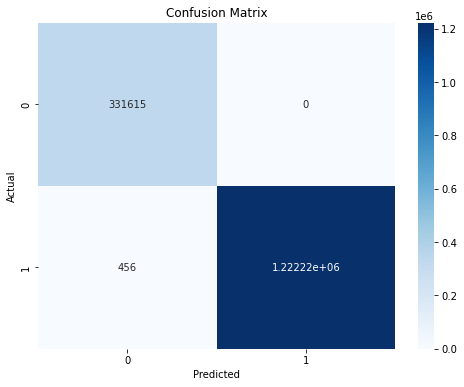

Confusion matrix on testing data:


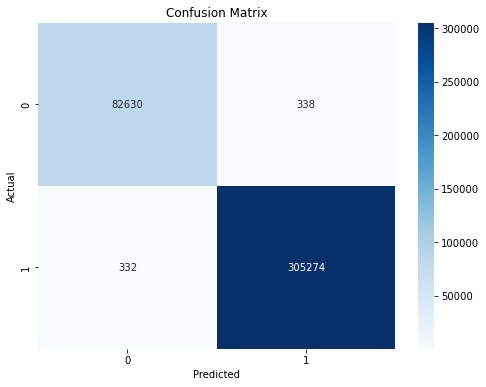

In [30]:
from sklearn.metrics import confusion_matrix
#Evaluate on training data
y_train_pred = dtree.predict(Xtrain)
train_cm = confusion_matrix(ytrain, y_train_pred)
print("Confusion matrix on training data:")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate on testing data
y_test_pred = dtree.predict(Xtest)
test_cm = confusion_matrix(ytest, y_test_pred)
print("Confusion matrix on testing data:")
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
from sklearn.metrics import classification_report,confusion_matrix
pred = dtree.predict(Xtest)
print(classification_report(ytest,pred,digits=3))

              precision    recall  f1-score   support

    Abnormal      0.996     0.996     0.996     82968
      Normal      0.999     0.999     0.999    305606

    accuracy                          0.998    388574
   macro avg      0.997     0.997     0.997    388574
weighted avg      0.998     0.998     0.998    388574



In [33]:
pred = dtree.predict(Xtrain)
print(classification_report(ytrain,pred,digits=3))

              precision    recall  f1-score   support

    Abnormal      0.999     1.000     0.999    331615
      Normal      1.000     1.000     1.000   1222681

    accuracy                          1.000   1554296
   macro avg      0.999     1.000     1.000   1554296
weighted avg      1.000     1.000     1.000   1554296

